# Epidemic Mitigation
The purpose of this notebook is to show some of the functions and classes provided in the Python code `sir.py`, and to use a minimal example to calculate the least-time trajectories and bounding curves $\Phi$, $\tau$ and $\Theta$ for the solution of the problem.

The following code cells show how the trajectory can be obtained from an arbitrary initial condition, with arbitrary parameters.

In [1]:
import sir
import matplotlib.pyplot as plt

In [2]:
### Set your parameters. The class ALWAYS takes imax and umax, but can handle
### either beta/gamma or r0. Set the ones you wish to use, and leave the rest
### as None. In this case, I set beta and gamma and leave r0 as None.

imax = 0.1
umax = 0.5
gamma = 0.2
beta = 0.5
r0 = None

if r0 is None:
    A = sir.SIR()
    A.set_params([imax, umax, gamma, beta], flag = "bg")
elif beta is None and gamma is None:
    A = sir.SIR()
    A.set_params([imax, umax, r0], flag = "r")
else:
    print("Please enter the parameters in a valid way.")

In [5]:
### Set an initial point for your system, get important features, and find the
### trajectory of least time to the safe zone.

s0, i0 = [0.8, 0.06]    # Set an arbitrary initial condition
P = A.add_point(s0, i0) # Add it to a set of points in the system
#A.find_curves()
A.find_regions()
A.get_shortest()
T = P.least_time

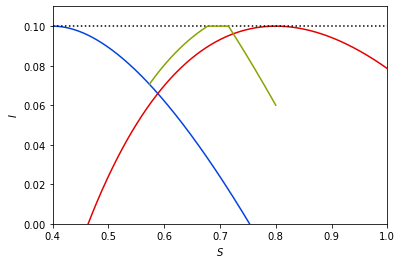

In [8]:
fig, ax = plt.subplots()
ax.set_xlim(A.sbar, 1)
ax.set_xlabel(r"$S$")
ax.set_ylim(0, A.imax*1.1)
ax.set_ylabel(r"$I$")
ax.plot(A.tau.s, A.tau.i, color = "xkcd:blue", linestyle = "-")
ax.plot(A.phi.s, A.phi.i, color = "xkcd:red", linestyle = "-")
ax.plot([A.sbar, 1], [A.imax, A.imax], color = "xkcd:black", linestyle = ":")
ax.plot(T.s, T.i, color = "xkcd:vomit green", linestyle = "-")

[[0, 2.834927451095658], [0, 1.858751018777099], [0, 7.790563091470478]]
[0, 0, 0.3939438348105838, 0.3474750593411563, 0.5, 0.5]


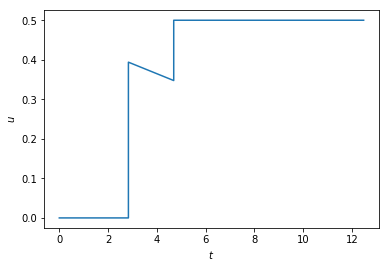

In [7]:
T.plot_time()